In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_white = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv',
                sep=';')

df_red = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv',
                sep=';')

In [3]:
# How to model immbalanced dataset
# which model performs best
# how to do benchmarking
# conclusion

In [4]:
df = pd.concat([df_red,df_white])

In [5]:
df_red.info() 

# type of data: float64(11), int64(1)
# number of rows: 1599 entries
# col count: total 12 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [8]:
set(df.quality) #checking unique values from the column

{3, 4, 5, 6, 7, 8, 9}

In [9]:
# change the data type
df['quality'] = pd.Categorical(df['quality'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null category
dtypes: category(1), float64(11)
memory usage: 615.8 KB


In [11]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [12]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [13]:
set(df.quality)

{3, 4, 5, 6, 7, 8, 9}

In [14]:
# Exploratory Data Analysis

In [15]:
import seaborn as sns

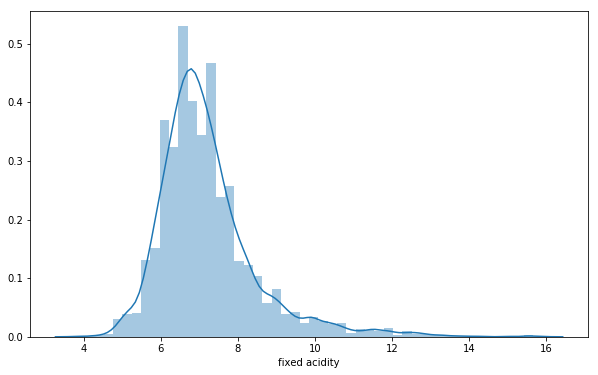

In [16]:
plt.figure(figsize=(10,6))
sns.distplot(df['fixed acidity']) # this feature is marginally right skewed, some outlier values

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

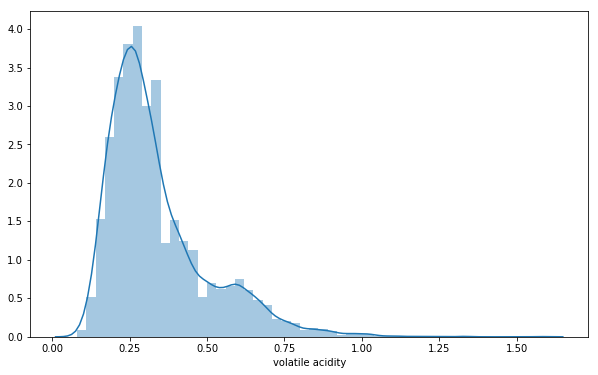

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(df['volatile acidity']) # this feature is right skewed, some outlier values

In [19]:
# checking the outlier values

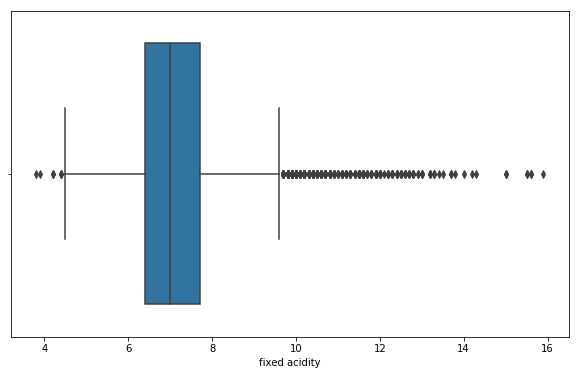

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(df['fixed acidity'])

In [21]:
# if the number of outliers less than 10%, it is ok
# if it is more than 10%, you need to cap the data points

In [22]:
df['fixed acidity'].describe()

count    6497.000000
mean        7.215307
std         1.296434
min         3.800000
25%         6.400000
50%         7.000000
75%         7.700000
max        15.900000
Name: fixed acidity, dtype: float64

In [23]:
IQR = df['fixed acidity'].describe()[6] - df['fixed acidity'].describe()[4]
IQR

1.2999999999999998

In [24]:
UCL = df['residual sugar'].describe()[6] + (1.5 * IQR)
LCL = df['residual sugar'].describe()[4] - (1.5 * IQR)

In [25]:
LCL

-0.1499999999999997

In [26]:
UCL

10.049999999999999

# 5.38 % outlier on the right hand side

In [27]:
(df[(df['residual sugar'] > UCL)].shape[0]/df.shape[0])*100 # 5.38 % outlier on the right hand side

18.53162998306911

In [28]:
(df[(df['residual sugar'] < LCL)].shape[0]/df.shape[0])*100 # 0.10 % outlier on the left hand side

0.0

In [29]:
((df[(df['residual sugar'] > UCL)].shape[0]/df.shape[0])*100) + (df[(df['residual sugar'] < LCL)].shape[0]/df.shape[0])*100 

18.53162998306911

In [30]:
# skewness of the target or dependent column

In [31]:
df.quality.value_counts()/df.shape[0]

6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: quality, dtype: float64

In [32]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [33]:
# class balance by combining to the nearest class
df['quality'] = df.quality.replace({3: 4, 9: 8})

In [34]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     246
8     198
Name: quality, dtype: int64

In [35]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [36]:
# 'residual sugar' should be considered to be removed from the dataset

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X = df[['fixed acidity', 'volatile acidity', 'citric acid', 
        'residual sugar',
       'chlorides', 
        'free sulfur dioxide', 
        'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']].as_matrix()
Y = df['quality'].as_matrix()

Xtrain, Xtest,Ytrain, Ytest = train_test_split(X,Y,test_size=0.20,
                                               random_state=1234)

Xtrain.shape, Xtest.shape, Ytrain.shape,Ytest.shape

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


((5197, 11), (1300, 11), (5197,), (1300,))

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
model1 = LogisticRegression()

In [41]:
model1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [42]:
model1.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [43]:
model1.score(Xtrain,Ytrain)
#0.539157206080431(with 11 features)
#0.5326149701751011(with 9 features)

0.539157206080431

In [44]:
model1.score(Xtest,Ytest)
#0.5376923076923077(with 11 features)
#0.53 (with 9 features)

0.5376923076923077

In [45]:
# Existence of Outliers has no role in predicting the classes of wine quality, no impact on the accuracy

In [46]:
model1.intercept_

array([ 0.02888043,  3.10953556, -0.58305411, -3.99748253, -1.8874633 ])

In [47]:
model1.coef_

array([[-3.89094191e-02,  2.61170832e+00, -3.07054607e-01,
        -4.94147896e-02, -2.38685142e-02, -5.98680065e-02,
         1.10495961e-02,  1.51580382e-02, -2.51437520e-04,
        -1.85777549e+00, -2.28835519e-01],
       [ 2.20475230e-02,  3.08409266e+00,  6.51345040e-01,
        -4.34536025e-02,  8.06738614e-01, -1.12586056e-02,
         6.00552950e-03,  3.10960178e+00,  3.15765996e-01,
        -1.17345382e+00, -8.66923137e-01],
       [ 3.13034096e-02, -2.35671594e+00, -6.46893636e-01,
         1.89924159e-02,  6.07422872e-01,  6.56770628e-03,
        -3.45068071e-03, -5.21156074e-01,  7.22696321e-02,
         3.71554777e-01,  1.19332575e-01],
       [ 1.05825140e-02, -3.30971731e+00, -3.52445207e-01,
         3.62553552e-02, -1.93782386e+00,  1.06903981e-02,
        -5.62738605e-03, -4.00264386e+00, -2.85222274e-01,
         1.56627242e+00,  7.15263807e-01],
       [-3.78657146e-01, -9.95274844e-01,  6.65596813e-01,
         5.87086454e-02, -3.63331859e-01,  2.66073527e-02,
  

In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [49]:
pred_quality = model1.predict(Xtest)

In [50]:
confusion_matrix(Ytest,pred_quality)

array([[  0,  32,  14,   0,   0],
       [  0, 267, 151,   1,   0],
       [  0, 140, 414,  10,   0],
       [  0,  15, 198,  18,   0],
       [  0,   2,  37,   1,   0]], dtype=int64)

In [51]:
print(classification_report(Ytest,pred_quality))

              precision    recall  f1-score   support

           4       0.00      0.00      0.00        46
           5       0.59      0.64      0.61       419
           6       0.51      0.73      0.60       564
           7       0.60      0.08      0.14       231
           8       0.00      0.00      0.00        40

   micro avg       0.54      0.54      0.54      1300
   macro avg       0.34      0.29      0.27      1300
weighted avg       0.52      0.54      0.48      1300



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [52]:
# grid search to identify the best parameters of the model

In [53]:
model2 = LogisticRegression(multi_class='auto',max_iter=10000)

In [54]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.cv_results_
    return top_params

In [55]:
#help(LogisticRegression)

In [56]:
model2

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [57]:
param_grid = {"C": [0.001,0.05,0.1],
             #"penalty": ['l2','l1'],
              'solver':['newton-cg', 'lbfgs', 'liblinear']
             }

In [58]:
from sklearn.model_selection import GridSearchCV
from time import time
from operator import itemgetter

In [59]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, model2, param_grid, cv=10)
print (top_para)

{'mean_fit_time': array([ 0.62108941,  3.06842277,  0.05568936,  1.3952379 , 12.09944973,
        0.10077124,  1.52381501, 12.18592527,  0.10462375]), 'std_fit_time': array([0.05271306, 0.55015604, 0.00248236, 0.14058134, 1.69114784,
       0.00815809, 0.10158797, 1.58957488, 0.00447827]), 'mean_score_time': array([0.00040038, 0.00030019, 0.00045052, 0.0004003 , 0.00045042,
       0.0004508 , 0.00030012, 0.00035026, 0.00045073]), 'std_score_time': array([0.00030027, 0.00024511, 0.00026974, 0.00020015, 0.00015014,
       0.00015027, 0.00024505, 0.00032049, 0.00015024]), 'param_C': masked_array(data=[0.001, 0.001, 0.001, 0.05, 0.05, 0.05, 0.1, 0.1, 0.1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_solver': masked_array(data=['newton-cg', 'lbfgs', 'liblinear', 'newton-cg',
                   'lbfgs', 'liblinear', 'newton-cg', 'lbfgs',
                   'liblinear'],
        

In [60]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
len(top_score)

32

In [61]:
pd.DataFrame(top_para)['rank_test_score']

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

0    8
1    7
2    9
3    4
4    3
5    6
6    2
7    1
8    5
Name: rank_test_score, dtype: int32

In [62]:
pd.DataFrame(top_para).tail(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_solver,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
6,1.523815,0.101588,0.000300,0.000245,0.1,newton-cg,"{'C': 0.1, 'solver': 'newton-cg'}",0.523992,0.558541,0.534615,...,0.543725,0.546504,0.546077,0.545007,0.546718,0.542442,0.545629,0.547009,0.545614,0.002260
7,12.185925,1.589575,0.000350,0.000320,0.1,lbfgs,"{'C': 0.1, 'solver': 'lbfgs'}",0.523992,0.552783,0.538462,...,0.544152,0.544580,0.545863,0.546077,0.546504,0.541800,0.544347,0.548291,0.545421,0.002006
8,0.104624,0.004478,0.000451,0.000150,0.1,liblinear,"{'C': 0.1, 'solver': 'liblinear'}",0.512476,0.556622,0.521154,...,0.529827,0.531110,0.532820,0.531110,0.531537,0.528544,0.531524,0.530983,0.530477,0.002144


In [63]:
model_final = LogisticRegression(C=0.1, 
                                solver='lbfgs')

In [64]:
model_final

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [65]:
model_final.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [66]:
model_final.score(Xtrain,Ytrain)

0.5324225514720031

In [67]:
model_final.score(Xtest,Ytest)

0.5269230769230769

In [68]:
# Limitations: why we are not getting a good accuracy?
# class imbalance
# outliers
# interaction between features
# non-linear relationship

In [69]:
df.quality.value_counts()/df.shape[0]

6    0.436509
5    0.329075
7    0.166077
4    0.037864
8    0.030476
Name: quality, dtype: float64

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1)
memory usage: 659.9 KB


In [71]:
# Non-linear 

In [72]:
# Non-linear model: Decision tree

In [73]:
from sklearn.tree import DecisionTreeClassifier

In [74]:
model_dt = DecisionTreeClassifier() 

In [75]:
model_dt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [76]:
model_dt.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [77]:
model_dt.score(Xtrain,Ytrain)

1.0

In [78]:
model_dt.score(Xtest,Ytest)

0.5938461538461538

In [79]:
param_grid = {"criterion": ["gini","entropy"],
             "min_samples_split": [10,20,30],
             "max_depth": [5,7],
             "min_samples_leaf":[10,15]}

In [80]:
cvDT = DecisionTreeClassifier()

In [81]:
cvDT

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [82]:
top_para = GridSearch_BestParam(Xtrain,Ytrain, cvDT, param_grid, cv=10)

In [83]:
dd = pd.DataFrame(top_para)[['rank_test_score','params']]

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [84]:
dd[dd.rank_test_score==1].values.flatten()[1]

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 10}

In [85]:
paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
paramCV

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 15,
 'min_samples_split': 10}

In [86]:
best_dtmodel = DecisionTreeClassifier(max_depth=paramCV['max_depth'], 
                                           min_samples_split=paramCV['min_samples_split'],
                                    min_samples_leaf=paramCV['min_samples_leaf'],
                                   criterion=paramCV['criterion'])
best_dtmodel

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [87]:
best_dtmodel.fit(Xtrain,Ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=15, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
best_dtmodel.score(Xtrain,Ytrain)

0.6170867808350972

In [89]:
best_dtmodel.score(Xtest,Ytest)

0.5592307692307692

In [90]:
best_dtmodel.feature_importances_

array([0.05632659, 0.16809601, 0.01443399, 0.04830826, 0.07754538,
       0.07510672, 0.03293075, 0.01247498, 0.0441276 , 0.07107017,
       0.39957954])

In [91]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [92]:
temp = pd.DataFrame()
temp['variable'] = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
temp['VarImp'] = np.round(best_dtmodel.feature_importances_,2)

In [93]:
temp.sort_index(by='VarImp',ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  """Entry point for launching an IPython kernel.


,variable,VarImp
10,alcohol,0.40
1,volatile acidity,0.17
4,chlorides,0.08
5,free sulfur dioxide,0.08
9,sulphates,0.07
0,fixed acidity,0.06
3,residual sugar,0.05
8,pH,0.04
6,total sulfur dioxide,0.03
2,citric acid,0.01


In [94]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display

ModuleNotFoundError: No module named 'pydotplus'

In [ ]:
dot_data = tree.export_graphviz(best_dtmodel, 
                                out_file=None, 
                                filled=True, 
                                rounded=True,
                                )
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [ ]:
graph.write_png('output.png')

# Experiment: Example of Bias and variance through IRIS dataset

In [ ]:
iris = pd.read_csv('https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv')

In [ ]:
iris.head()

In [ ]:
model3 = DecisionTreeClassifier()

In [ ]:
X = iris[['sepal_length','sepal_width']]
Y = iris['species']

In [ ]:
xtr, xts, ytr, yts = train_test_split(X,Y,test_size=0.30,random_state=45)

In [ ]:
xtr.shape, xts.shape, ytr.shape, yts.shape

In [ ]:
model3.fit(xtr,ytr)

In [ ]:
model3.score(xtr,ytr)

In [ ]:
model3.score(xts,yts)

In [ ]:
pred_y = model3.predict(xts)

In [ ]:
print(classification_report(pred_y,yts))

In [ ]:
temp1 = pd.DataFrame()
temp1['variable'] = ['sepal_length','sepal_width']
temp1['VarImp'] = np.round(model3.feature_importances_,2)

In [ ]:
temp1.sort_index(by='VarImp',ascending=False)

# variable	VarImp
#2	petal_length	0.58
#3	petal_width	0.40
#1	sepal_width	0.02
#0	sepal_length	0.00

# variable	VarImp
#0	sepal_length	0.64
#1	sepal_width	0.36

In [95]:
# bias and variance is due to selection of samples and features as well

In [96]:
# three different ways to trade-off between bias and variance

#1. Bootstrap Aggregation (Bagging)
#2. Boosting 
#3. Stacking: Same Variant Stacking and Different Variant Stacking

In [97]:
# Bagging: Bagging classifier, Random forest classification

In [98]:
Xtrain.shape, Ytrain.shape, Xtest.shape, Ytest.shape

((5197, 11), (5197,), (1300, 11), (1300,))

In [99]:
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

In [100]:
model5 = BaggingClassifier()

In [101]:
model5

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [102]:
model5.fit(Xtrain, Ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=10, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [103]:
model5.score(Xtrain,Ytrain)

0.9861458533769483

In [104]:
model5.score(Xtest,Ytest)

0.6461538461538462

In [105]:
param_grid = {"n_estimators": [50,100,150,200,250],
             "max_samples": [0.7,0.8,0.9],
             "max_features": [5,6,7,8]}

top_para = GridSearch_BestParam(Xtrain,Ytrain, model5, param_grid, cv=10)

dd = pd.DataFrame(top_para)[['rank_test_score','params']]

paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
print(paramCV)

{'max_features': 8, 'max_samples': 0.9, 'n_estimators': 150}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [106]:
best_dtmodel = BaggingClassifier(n_estimators=paramCV['n_estimators'], 
                                           max_samples=paramCV['max_samples'],
                                    max_features=paramCV['max_features'])
best_dtmodel

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=8, max_samples=0.9,
         n_estimators=150, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [107]:
best_dtmodel.fit(Xtrain,Ytrain)

BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=8, max_samples=0.9,
         n_estimators=150, n_jobs=None, oob_score=False, random_state=None,
         verbose=0, warm_start=False)

In [108]:
print(best_dtmodel.score(Xtrain,Ytrain))
print(best_dtmodel.score(Xtest,Ytest))

1.0
0.683076923076923


In [109]:
model7 = RandomForestClassifier()

In [110]:
model7.fit(Xtrain,Ytrain)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [111]:
print(model7.score(Xtrain,Ytrain))
print(model7.score(Xtest,Ytest))

0.9863382720800462
0.65


In [112]:
param_grid = {"n_estimators": [50,100,150,200,250],
              "criterion":['gini','entropy'],
             "max_depth": [5,7,8,9],
             "max_features": [4,5,6,7]}

top_para = GridSearch_BestParam(Xtrain,Ytrain, model7, param_grid, cv=10)

dd = pd.DataFrame(top_para)[['rank_test_score','params']]

paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
print(paramCV)

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 5, 'n_estimators': 150}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [113]:
param_grid = {"n_estimators": [100,150,200],
              "criterion":['gini','entropy'],
             "max_depth": [9,10,12],
             "max_features": [4,5]}

top_para = GridSearch_BestParam(Xtrain,Ytrain, model7, param_grid, cv=5)

dd = pd.DataFrame(top_para)[['rank_test_score','params']]

paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
print(paramCV)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 5, 'n_estimators': 100}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [114]:
best_model = RandomForestClassifier(n_estimators=paramCV['n_estimators'], 
                                           max_depth=paramCV['max_depth'],
                                    max_features=paramCV['max_features'],
                                criterion=paramCV['criterion'])
best_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [115]:
best_model.fit(Xtrain,Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=12, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [116]:
print(best_model.score(Xtrain,Ytrain))
print(best_model.score(Xtest,Ytest))

0.9559361169905715
0.67


#                                                  Train	Test	Diff	
#  Logistic regression	Model 1	54%	54%	0%	
#                                     Model 2	53%	53%	1%	
#  Decision Tree	        Model 3	100%	59%	41%	
#                                     Model 4	62%	56%	6%	
#  Bagging	                   Model 5	99%	64%	35%	
#                                     Model 6	100%	68%	32%	
#  Randomforest	          Model7	99%	65%	34%	
#                                      Model8	79%	62%	17%	Bias/Variance trade off is optimal


In [117]:
temp = pd.DataFrame()
temp['variable'] = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
temp['VarImp'] = np.round(best_model.feature_importances_,2)

temp.sort_index(by='VarImp',ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)
  import sys


,variable,VarImp
10,alcohol,0.17
1,volatile acidity,0.11
7,density,0.10
5,free sulfur dioxide,0.09
3,residual sugar,0.08
4,chlorides,0.08
6,total sulfur dioxide,0.08
8,pH,0.08
9,sulphates,0.08
0,fixed acidity,0.07


In [118]:
# 11 features

In [119]:
# Task:
# create dummy features and train random forest classifier on this

In [120]:
dffa = pd.get_dummies(pd.qcut(df['fixed acidity'],q=5),prefix='fixed acidity',drop_first=True)
dfva = pd.get_dummies(pd.qcut(df['volatile acidity'],q=5),prefix='volatile acidity',drop_first=True)
dfca = pd.get_dummies(pd.qcut(df['citric acid'],q=5),prefix='citric acid',drop_first=True)
dfrs = pd.get_dummies(pd.qcut(df['residual sugar'],q=5),prefix='residual sugar',drop_first=True)
dfc = pd.get_dummies(pd.qcut(df['chlorides'],q=5),prefix='chlorides',drop_first=True)
dffsd = pd.get_dummies(pd.qcut(df['free sulfur dioxide'],q=5),prefix='free sulfur dioxide',drop_first=True)
dftsd = pd.get_dummies(pd.qcut(df['total sulfur dioxide'],q=5),prefix='total sulfur dioxide',drop_first=True)
dfd = pd.get_dummies(pd.qcut(df['density'],q=5),prefix='density',drop_first=True)
dfph = pd.get_dummies(pd.qcut(df['pH'],q=5),prefix='pH',drop_first=True)
dfs = pd.get_dummies(pd.qcut(df['sulphates'],q=5),prefix='sulphates',drop_first=True)
dfa = pd.get_dummies(pd.qcut(df['alcohol'],q=5),prefix='alcohol',drop_first=True)
dfq = df.quality

In [121]:
df_new = pd.concat([dffa,dfva,dfca,dfrs,dfc,dffsd,dftsd,dfd,dfph,dfs,dfa,dfq],axis=1)

In [122]:
df_new.head()

,"fixed acidity_(6.3, 6.8]","fixed acidity_(6.8, 7.2]","fixed acidity_(7.2, 7.9]","fixed acidity_(7.9, 15.9]","volatile acidity_(0.21, 0.27]","volatile acidity_(0.27, 0.32]","volatile acidity_(0.32, 0.45]","volatile acidity_(0.45, 1.58]","citric acid_(0.23, 0.29]","citric acid_(0.29, 0.34]",...,"pH_(3.35, 4.01]","sulphates_(0.41, 0.48]","sulphates_(0.48, 0.54]","sulphates_(0.54, 0.63]","sulphates_(0.63, 2.0]","alcohol_(9.4, 9.9]","alcohol_(9.9, 10.7]","alcohol_(10.7, 11.5]","alcohol_(11.5, 14.9]",quality
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,5
1,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,5
2,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,5
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,6
4,0,0,1,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,5


In [123]:
y = df_new.pop('quality')
X = df_new

In [124]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y, test_size=0.30,random_state=1234)

In [125]:
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((4547, 44), (1950, 44), (4547,), (1950,))

In [126]:
model8 = RandomForestClassifier()

In [127]:
param_grid = {"n_estimators": [100,150,200],
              "criterion":['gini','entropy'],
             "max_depth": [9,10,12],
             "max_features": [4,5]}

top_para = GridSearch_BestParam(xtrain,ytrain, model8, param_grid, cv=5)

dd = pd.DataFrame(top_para)[['rank_test_score','params']]

paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
print(paramCV)

best_model = RandomForestClassifier(n_estimators=paramCV['n_estimators'], 
                                           max_depth=paramCV['max_depth'],
                                    max_features=paramCV['max_features'],
                                criterion=paramCV['criterion'])
best_model

best_model.fit(xtrain,ytrain)

print(best_model.score(xtrain,ytrain))
print(best_model.score(xtest,ytest))

df_new.columns

temp = pd.DataFrame()
temp['variable'] = ['fixed acidity_(6.3, 6.8]', 'fixed acidity_(6.8, 7.2]',
       'fixed acidity_(7.2, 7.9]', 'fixed acidity_(7.9, 15.9]',
       'volatile acidity_(0.21, 0.27]', 'volatile acidity_(0.27, 0.32]',
       'volatile acidity_(0.32, 0.45]', 'volatile acidity_(0.45, 1.58]',
       'citric acid_(0.23, 0.29]', 'citric acid_(0.29, 0.34]',
       'citric acid_(0.34, 0.42]', 'citric acid_(0.42, 1.66]',
       'residual sugar_(1.7, 2.3]', 'residual sugar_(2.3, 5.0]',
       'residual sugar_(5.0, 9.6]', 'residual sugar_(9.6, 65.8]',
       'chlorides_(0.036, 0.044]', 'chlorides_(0.044, 0.051]',
       'chlorides_(0.051, 0.073]', 'chlorides_(0.073, 0.611]',
       'free sulfur dioxide_(15.0, 24.0]', 'free sulfur dioxide_(24.0, 33.0]',
       'free sulfur dioxide_(33.0, 45.0]', 'free sulfur dioxide_(45.0, 289.0]',
       'total sulfur dioxide_(62.2, 105.0]',
       'total sulfur dioxide_(105.0, 132.0]',
       'total sulfur dioxide_(132.0, 165.0]',
       'total sulfur dioxide_(165.0, 440.0]', 'density_(0.992, 0.994]',
       'density_(0.994, 0.996]', 'density_(0.996, 0.997]',
       'density_(0.997, 1.039]', 'pH_(3.08, 3.17]', 'pH_(3.17, 3.25]',
       'pH_(3.25, 3.35]', 'pH_(3.35, 4.01]', 'sulphates_(0.41, 0.48]',
       'sulphates_(0.48, 0.54]', 'sulphates_(0.54, 0.63]',
       'sulphates_(0.63, 2.0]', 'alcohol_(9.4, 9.9]', 'alcohol_(9.9, 10.7]',
       'alcohol_(10.7, 11.5]', 'alcohol_(11.5, 14.9]']
temp['VarImp'] = np.round(best_model.feature_importances_,2)

temp.sort_index(by='VarImp',ascending=False)

{'criterion': 'entropy', 'max_depth': 12, 'max_features': 4, 'n_estimators': 200}


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

In [135]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [136]:
model9 = AdaBoostClassifier()
model9

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [137]:
param_grid = {"n_estimators": [100,150,200],
              "learning_rate": [0.05,0.10]}

top_para = GridSearch_BestParam(xtrain,ytrain, model9, param_grid, cv=5)

dd = pd.DataFrame(top_para)[['rank_test_score','params']]

paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
print(paramCV)

best_model = AdaBoostClassifier(n_estimators=paramCV['n_estimators'], 
                                           learning_rate=paramCV['learning_rate'])
best_model

best_model.fit(xtrain,ytrain)

print(best_model.score(xtrain,ytrain))
print(best_model.score(xtest,ytest))

df_new.columns

temp = pd.DataFrame()
temp['variable'] = ['fixed acidity_(6.3, 6.8]', 'fixed acidity_(6.8, 7.2]',
       'fixed acidity_(7.2, 7.9]', 'fixed acidity_(7.9, 15.9]',
       'volatile acidity_(0.21, 0.27]', 'volatile acidity_(0.27, 0.32]',
       'volatile acidity_(0.32, 0.45]', 'volatile acidity_(0.45, 1.58]',
       'citric acid_(0.23, 0.29]', 'citric acid_(0.29, 0.34]',
       'citric acid_(0.34, 0.42]', 'citric acid_(0.42, 1.66]',
       'residual sugar_(1.7, 2.3]', 'residual sugar_(2.3, 5.0]',
       'residual sugar_(5.0, 9.6]', 'residual sugar_(9.6, 65.8]',
       'chlorides_(0.036, 0.044]', 'chlorides_(0.044, 0.051]',
       'chlorides_(0.051, 0.073]', 'chlorides_(0.073, 0.611]',
       'free sulfur dioxide_(15.0, 24.0]', 'free sulfur dioxide_(24.0, 33.0]',
       'free sulfur dioxide_(33.0, 45.0]', 'free sulfur dioxide_(45.0, 289.0]',
       'total sulfur dioxide_(62.2, 105.0]',
       'total sulfur dioxide_(105.0, 132.0]',
       'total sulfur dioxide_(132.0, 165.0]',
       'total sulfur dioxide_(165.0, 440.0]', 'density_(0.992, 0.994]',
       'density_(0.994, 0.996]', 'density_(0.996, 0.997]',
       'density_(0.997, 1.039]', 'pH_(3.08, 3.17]', 'pH_(3.17, 3.25]',
       'pH_(3.25, 3.35]', 'pH_(3.35, 4.01]', 'sulphates_(0.41, 0.48]',
       'sulphates_(0.48, 0.54]', 'sulphates_(0.54, 0.63]',
       'sulphates_(0.63, 2.0]', 'alcohol_(9.4, 9.9]', 'alcohol_(9.9, 10.7]',
       'alcohol_(10.7, 11.5]', 'alcohol_(11.5, 14.9]']
temp['VarImp'] = np.round(best_model.feature_importances_,2)

temp.sort_index(by='VarImp',ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'learning_rate': 0.1, 'n_estimators': 200}
0.5139652518143831
0.4948717948717949


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:47: FutureWarning: by argument to sort_index is deprecated, please use .sort_values(by=...)


,variable,VarImp
43,"alcohol_(11.5, 14.9]",0.12
22,"free sulfur dioxide_(33.0, 45.0]",0.09
23,"free sulfur dioxide_(45.0, 289.0]",0.08
27,"total sulfur dioxide_(165.0, 440.0]",0.08
7,"volatile acidity_(0.45, 1.58]",0.07
42,"alcohol_(10.7, 11.5]",0.06
21,"free sulfur dioxide_(24.0, 33.0]",0.06
9,"citric acid_(0.29, 0.34]",0.06
19,"chlorides_(0.073, 0.611]",0.06
39,"sulphates_(0.63, 2.0]",0.06


In [138]:
model10 = GradientBoostingClassifier()

In [141]:
model10

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [140]:
help(model10)

Help on GradientBoostingClassifier in module sklearn.ensemble.gradient_boosting object:

class GradientBoostingClassifier(BaseGradientBoosting, sklearn.base.ClassifierMixin)
 |  GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, min_impurity_split=None, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, presort='auto', validation_fraction=0.1, n_iter_no_change=None, tol=0.0001)
 |  
 |  Gradient Boosting for classification.
 |  
 |  GB builds an additive model in a
 |  forward stage-wise fashion; it allows for the optimization of
 |  arbitrary differentiable loss functions. In each stage ``n_classes_``
 |  regression trees are fit on the negative gradient of the
 |  binomial or multinomial deviance loss function. Binary classification
 |  is a special case whe

In [148]:
param_grid = {"criterion":['friedman_mse','mae','mse'],
"learning_rate":[0.1,0.5,0.05,0.005], 
"max_depth":[3,5,7],
"max_features":[5,8,10,12,None], 
"n_estimators":[100,200,500,750,1000]
    }

top_para = GridSearch_BestParam(xtrain,ytrain, model10, param_grid, cv=5)

dd = pd.DataFrame(top_para)[['rank_test_score','params']]

paramCV = dd[dd.rank_test_score==1].values.flatten()[1]
print(paramCV)

best_model = GradientBoostingClassifier(n_estimators=paramCV['n_estimators'],
                                learning_rate=paramCV['learning_rate'],
                               criterion = paramCV['criterion'],
                              max_depth=paramCV['max_depth'],
                               max_features=paramCV['max_features'])
best_model

best_model.fit(xtrain,ytrain)

print(best_model.score(xtrain,ytrain))
print(best_model.score(xtest,ytest))

df_new.columns

temp = pd.DataFrame()
temp['variable'] = ['fixed acidity_(6.3, 6.8]', 'fixed acidity_(6.8, 7.2]',
       'fixed acidity_(7.2, 7.9]', 'fixed acidity_(7.9, 15.9]',
       'volatile acidity_(0.21, 0.27]', 'volatile acidity_(0.27, 0.32]',
       'volatile acidity_(0.32, 0.45]', 'volatile acidity_(0.45, 1.58]',
       'citric acid_(0.23, 0.29]', 'citric acid_(0.29, 0.34]',
       'citric acid_(0.34, 0.42]', 'citric acid_(0.42, 1.66]',
       'residual sugar_(1.7, 2.3]', 'residual sugar_(2.3, 5.0]',
       'residual sugar_(5.0, 9.6]', 'residual sugar_(9.6, 65.8]',
       'chlorides_(0.036, 0.044]', 'chlorides_(0.044, 0.051]',
       'chlorides_(0.051, 0.073]', 'chlorides_(0.073, 0.611]',
       'free sulfur dioxide_(15.0, 24.0]', 'free sulfur dioxide_(24.0, 33.0]',
       'free sulfur dioxide_(33.0, 45.0]', 'free sulfur dioxide_(45.0, 289.0]',
       'total sulfur dioxide_(62.2, 105.0]',
       'total sulfur dioxide_(105.0, 132.0]',
       'total sulfur dioxide_(132.0, 165.0]',
       'total sulfur dioxide_(165.0, 440.0]', 'density_(0.992, 0.994]',
       'density_(0.994, 0.996]', 'density_(0.996, 0.997]',
       'density_(0.997, 1.039]', 'pH_(3.08, 3.17]', 'pH_(3.17, 3.25]',
       'pH_(3.25, 3.35]', 'pH_(3.35, 4.01]', 'sulphates_(0.41, 0.48]',
       'sulphates_(0.48, 0.54]', 'sulphates_(0.54, 0.63]',
       'sulphates_(0.63, 2.0]', 'alcohol_(9.4, 9.9]', 'alcohol_(9.9, 10.7]',
       'alcohol_(10.7, 11.5]', 'alcohol_(11.5, 14.9]']
temp['VarImp'] = np.round(best_model.feature_importances_,2)

temp.sort_index(by='VarImp',ascending=False)

KeyboardInterrupt: 

In [144]:
gbm = GradientBoostingClassifier()

In [145]:
gbm.fit(xtrain,ytrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [146]:
gbm.score(xtrain,ytrain)

0.615790631185397

In [147]:
gbm.score(xtest,ytest)

0.5384615384615384